In [285]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import cv2
import PIL
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D

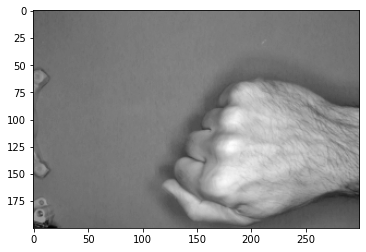

In [286]:
# This cell is used to show an image from the dataset. 

DATADIR = r"C:\Users\markn\OneDrive\Desktop\Spring 2021\CS 4662 - Advanced Machine Learning\archive"
# DATADIR = r'./kaggle-rps'
# subfolders in RPS folder
CATEGORIES = ["rock", "paper", "scissors"]

for category in CATEGORIES:
    path = os.path.join(DATADIR, category) # paths to RPS dir
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
        # changing to grayscale so its faster processing.
        plt.imshow(img_array, cmap="gray")
        plt.show()
        break
    break

In [287]:
print(img_array)

[[88 88 86 ... 95 94 93]
 [87 89 86 ... 96 94 95]
 [86 87 89 ... 96 96 95]
 ...
 [28 33 60 ... 85 85 85]
 [26 28 31 ... 85 85 86]
 [26 32 31 ... 86 86 86]]


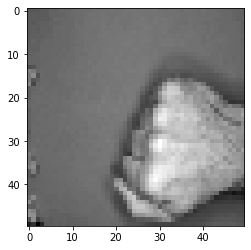

In [288]:
IMG_SIZE = 50

new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array, cmap = "gray")
plt.show()

### Creating training set and giving it a label.

In [289]:
# creating the training set, getting the dimensions of the image, 
# and giving it a label based on it being rock, paper, or scissors.

training_data = []

def create_training_data():
    for category in CATEGORIES:
        path = os.path.join(DATADIR, category) # paths to RPS dir
        class_num = CATEGORIES.index(category)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
                training_data.append([new_array, class_num])
            except Exception as e:
                pass
            
create_training_data()

In [290]:
print(len(training_data))

2188


### Shuffles the training set.

In [291]:
import random

# shuffles the training set.
random.shuffle(training_data)

In [292]:
# shows that the training set is shuffled
for sample in training_data[:10]:
    print(sample[1])

1
1
1
2
0
2
1
1
0
0


### Creating the training and testing set.

In [293]:
X = []
y = []

In [294]:
for features, label in training_data:
    X.append(features)
    y.append(label)

# import note: the 1 at the end represents grayscale. if using color,
# make sure to use 3 instead of 1. 
X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
y = np.array(y)

In [295]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2)

### One hot encoding for labels. Changes Y into vector.

In [296]:
from numpy import array
from numpy import argmax
from keras.utils import to_categorical
# define example
data = y #REPLACE THIS LINE WITH YOUR ARRAY


data = array(data)
print(data)
# one hot encode
encoded = to_categorical(data)
print(encoded)
# invert encoding
inverted = argmax(encoded[0])
print(inverted)

[1 1 1 ... 1 1 0]
[[0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 ...
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]]
1


In [297]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, encoded, test_size=0.3, random_state=2)

In [298]:
print(X_train.shape)
print(X_test.shape)

print(y_train.shape)
print(y_test.shape)

(1531, 50, 50, 1)
(657, 50, 50, 1)
(1531, 3)
(657, 3)


In [299]:
print(X.shape)

(2188, 50, 50, 1)


In [300]:
print(encoded.shape)

(2188, 3)


### Creating ConvNet Neural Network Model.

In [301]:
model = Sequential ([
    Conv2D(filters=32, kernel_size=(3, 3), activation='relu', padding='same', input_shape=(X.shape[1:])),
    MaxPooling2D(pool_size=(2, 2), strides=2),
    Dropout(0.25),
    Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding='same'),
    Dropout(0.15),
    MaxPooling2D(pool_size=(2, 2), strides=2),
    Flatten(),
    Dense(units=3, activation='softmax')
])

In [302]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_14 (Conv2D)           (None, 50, 50, 32)        320       
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 25, 25, 32)        0         
_________________________________________________________________
dropout_14 (Dropout)         (None, 25, 25, 32)        0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 25, 25, 64)        18496     
_________________________________________________________________
dropout_15 (Dropout)         (None, 25, 25, 64)        0         
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_7 (Flatten)          (None, 9216)             

In [303]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [304]:
fitted_model = model.fit(X_train, y_train, batch_size=32, epochs=100, validation_split=0.25)

Epoch 1/100
36/36 [==============================] - 2s 43ms/step - loss: 44.3705 - accuracy: 0.3691 - val_loss: 1.1006 - val_accuracy: 0.2898
Epoch 2/100
36/36 [==============================] - 1s 41ms/step - loss: 1.1366 - accuracy: 0.3385 - val_loss: 1.0991 - val_accuracy: 0.3003
Epoch 3/100
36/36 [==============================] - 1s 40ms/step - loss: 1.1225 - accuracy: 0.2973 - val_loss: 1.0986 - val_accuracy: 0.3003
Epoch 4/100
36/36 [==============================] - 1s 40ms/step - loss: 1.0953 - accuracy: 0.3569 - val_loss: 1.0987 - val_accuracy: 0.3029
Epoch 5/100
36/36 [==============================] - 1s 40ms/step - loss: 1.1031 - accuracy: 0.3427 - val_loss: 1.0986 - val_accuracy: 0.3838
Epoch 6/100
36/36 [==============================] - 1s 39ms/step - loss: 1.1030 - accuracy: 0.3460 - val_loss: 1.0984 - val_accuracy: 0.3864
Epoch 7/100
36/36 [==============================] - 1s 40ms/step - loss: 1.1074 - accuracy: 0.3303 - val_loss: 1.0984 - val_accuracy: 0.3864
Epoch

### CNN Evaluation.

In [305]:
model.evaluate(X_test, y_test)

21/21 [==============================] - 0s 8ms/step - loss: 0.2494 - accuracy: 0.9498


[0.2493857741355896, 0.9497717022895813]

### ROC Curve for CNN.

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


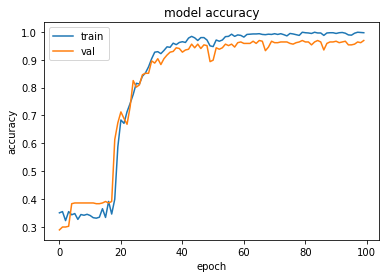

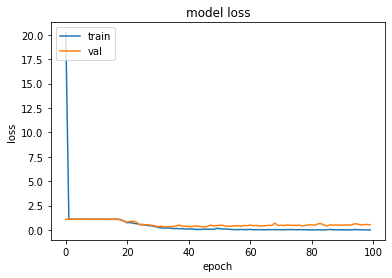

In [306]:
history_dict = fitted_model.history
print(history_dict.keys())

plt.plot(fitted_model.history['accuracy'])
plt.plot(fitted_model.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

plt.plot(fitted_model.history['loss'])
plt.plot(fitted_model.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

### Reshape X and Y for other ML Algorithms.

In [307]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2)
X_train = X_train.reshape(1531, 50 * 50 * 1)
X_test = X_test.reshape(657, 50 * 50 * 1)
# y_train, y_test = train_test_split(y, test_size=0.3, random_state=2)

In [308]:
print(X_train.shape)
print(X_test.shape)

(1531, 2500)
(657, 2500)


#### Logistic Regression

In [309]:
from sklearn.linear_model import LogisticRegression

my_logreg = LogisticRegression()

# Training ONLY on the training set:
my_logreg.fit(X_train, y_train)

# Testing on the testing set:
y_predict_lr = my_logreg.predict(X_test)

print(y_predict_lr, '\n')

from sklearn.metrics import accuracy_score
score_lr = accuracy_score(y_test, y_predict_lr)
print('Accuracy:', score_lr, '\n')

[1 2 2 1 2 1 2 2 2 0 1 2 2 2 0 0 0 1 1 1 2 0 2 2 2 0 0 2 2 0 1 0 0 2 2 1 0
 2 2 2 1 2 1 1 2 0 1 0 1 1 2 0 1 0 0 2 0 2 2 2 0 0 1 0 0 2 0 2 1 1 1 1 1 0
 0 0 0 0 1 2 2 1 2 1 2 0 0 0 0 2 2 2 0 2 2 2 2 0 0 2 2 1 0 0 2 0 1 2 1 1 2
 2 0 1 1 0 2 2 1 0 2 2 2 1 0 1 2 2 1 2 2 1 2 2 2 1 2 0 2 2 2 0 0 2 1 0 1 1
 0 0 2 0 2 2 1 2 2 1 0 0 2 1 1 0 2 2 0 1 0 0 1 2 2 1 0 0 2 1 2 2 2 0 1 0 1
 0 1 0 1 2 1 1 0 2 0 2 2 1 0 2 0 0 0 1 0 1 0 0 2 2 2 1 1 2 0 0 0 2 0 0 2 0
 0 1 2 0 2 1 2 1 2 0 1 2 2 1 1 1 2 0 1 0 0 0 1 2 0 0 1 2 2 2 0 0 1 1 1 2 0
 2 2 1 1 1 0 2 2 0 2 0 1 0 1 2 2 1 2 1 2 0 2 0 2 0 1 1 2 0 0 1 1 0 0 1 1 2
 1 1 0 2 1 2 1 0 2 1 2 0 1 1 1 2 1 1 1 0 1 0 1 2 0 2 1 1 0 2 0 2 0 0 0 1 2
 1 1 0 0 2 1 1 0 2 2 0 1 2 0 2 1 2 0 2 2 1 1 1 2 2 1 2 2 0 0 1 2 2 2 2 1 0
 0 2 1 1 2 2 2 0 0 1 0 1 2 2 0 1 2 1 1 1 2 2 2 1 0 0 0 0 2 0 2 1 0 1 2 0 1
 2 0 0 1 2 2 0 0 0 1 0 2 1 2 1 1 0 2 0 0 1 2 2 1 2 2 2 2 1 2 0 2 1 2 1 2 2
 1 2 2 2 1 1 0 2 1 2 0 0 0 0 0 0 2 1 2 2 0 1 2 0 1 0 0 0 1 1 0 2 1 0 1 2 2
 0 0 2 0 2 1 0 1 0 0 0 2 

C:\Users\markn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [310]:
# Predicting the Binary Label:
y_predict_lr = my_logreg.predict(X_test)

# Estimating the probability (likelihood) of Each Label: 
y_predict_prob_lr = my_logreg.predict_proba(X_test)

In [311]:
from sklearn import metrics

fpr_lr, tpr_lr, thresholds_lr = metrics.roc_curve(y_test, y_predict_prob_lr[:,1], pos_label=1)

# print(fpr_lr)
# print(tpr_lr)
# print('\n')

# AUC:
AUC_lr = metrics.auc(fpr_lr, tpr_lr)
print("AUC:", AUC_lr)

AUC: 0.84297705424466


#### KNN

In [312]:
from sklearn.neighbors import KNeighborsClassifier

k = 3
knn = KNeighborsClassifier(n_neighbors=k) 
knn.fit(X_train, y_train)
y_predict_knn = knn.predict(X_test)
print(y_predict_knn, '\n')

from sklearn.metrics import accuracy_score
score_knn = accuracy_score(y_test, y_predict_knn)
print('Accuracy:', score_knn, '\n')

[1 2 2 2 2 1 1 2 2 0 1 1 2 2 0 0 2 1 0 1 1 0 2 1 0 0 0 0 2 0 1 0 0 2 2 1 1
 0 2 2 1 2 1 0 2 0 1 0 1 2 2 0 2 0 0 1 2 0 2 0 0 0 1 0 0 2 0 2 1 1 1 1 0 1
 0 1 2 1 1 2 2 1 2 1 1 0 0 0 0 0 0 2 0 2 0 2 2 0 2 1 2 1 2 0 0 0 2 2 1 0 1
 2 1 1 0 0 2 1 0 0 2 2 2 1 0 0 2 2 1 1 2 1 2 2 2 0 1 0 2 0 0 0 2 1 1 0 1 1
 1 0 2 0 2 2 2 2 2 1 0 0 0 1 1 1 2 2 0 0 2 0 2 0 2 1 1 0 0 0 0 2 2 0 1 2 2
 2 2 0 1 1 1 0 0 2 0 1 0 1 0 2 0 0 1 1 0 1 0 0 0 2 2 2 1 1 0 1 0 2 0 0 0 2
 0 1 2 0 2 0 2 1 0 2 1 1 2 0 0 0 2 0 1 0 1 2 2 2 0 2 1 2 2 2 0 2 1 1 2 2 0
 0 2 1 1 1 2 2 1 0 2 2 1 0 0 1 2 1 2 1 2 0 2 2 2 0 1 1 1 0 0 1 1 0 0 1 1 2
 1 1 1 2 1 2 1 2 2 2 1 0 1 1 2 1 1 1 2 0 0 0 1 0 2 2 1 1 2 2 0 2 0 0 0 1 1
 1 1 0 1 0 1 1 0 0 2 2 1 2 0 2 1 0 0 1 2 1 0 1 2 1 1 1 2 0 0 0 0 2 2 2 1 0
 0 2 1 1 1 2 2 0 2 2 0 1 2 2 1 1 1 1 1 1 2 0 2 0 0 0 2 0 2 0 2 1 1 0 1 2 2
 2 1 0 2 2 2 2 0 0 1 0 2 0 2 1 1 0 0 0 0 1 2 1 1 1 1 2 2 1 2 0 2 2 1 1 0 1
 1 2 0 0 1 1 2 2 1 2 0 0 0 0 0 0 2 1 0 0 0 1 0 0 1 0 0 0 1 1 2 2 1 1 1 2 1
 0 0 1 1 2 1 0 1 0 0 0 2 

In [313]:
# Predicting the Binary Label:
y_predict_knn = knn.predict(X_test)

# Estimating the probability (likelihood) of Each Label: 
y_predict_prob_knn = knn.predict_proba(X_test)

In [314]:
from sklearn import metrics

fpr_knn, tpr_knn, thresholds_knn = metrics.roc_curve(y_test, y_predict_prob_knn[:,1], pos_label=1)

# print(fpr_knn)
# print(tpr_knn)
# print('\n')

# AUC:
AUC_knn = metrics.auc(fpr_knn, tpr_knn)
print("AUC:", AUC_knn)

AUC: 0.9713991016807918


#### Decision Tree

In [315]:
from sklearn.tree import DecisionTreeClassifier

my_DecisionTree = DecisionTreeClassifier()

# Training ONLY on the training set:
my_DecisionTree.fit(X_train, y_train)

# Testing on the testing set:
y_predict_dt = my_DecisionTree.predict(X_test)

print(y_predict_dt, '\n')

from sklearn.metrics import accuracy_score
score_dt = accuracy_score(y_test, y_predict_dt)
print('Accuracy:', score_dt, '\n')

[2 2 2 2 2 1 0 2 1 0 2 0 2 2 0 1 0 1 2 1 2 2 2 2 2 0 0 0 2 0 1 0 2 2 2 1 1
 0 2 2 1 2 0 2 2 0 1 1 1 1 2 2 2 0 0 0 2 0 2 0 0 0 1 0 0 1 0 2 1 1 1 1 2 1
 2 1 1 2 1 2 1 1 2 1 1 0 0 0 0 2 0 2 0 2 2 2 2 0 2 0 2 1 2 2 0 0 2 2 1 1 1
 2 1 1 0 0 2 1 0 0 2 2 0 1 0 0 2 2 1 1 2 1 2 2 2 1 1 0 2 0 0 0 2 1 0 0 1 1
 0 0 0 0 2 2 2 2 2 1 2 0 0 1 2 0 2 2 0 0 2 0 2 1 2 1 1 0 0 0 0 2 2 1 2 2 2
 1 2 0 1 0 1 0 0 2 0 2 0 1 2 2 0 0 1 1 0 1 1 0 0 2 2 0 1 1 0 2 1 2 0 0 2 2
 0 0 2 0 2 0 2 1 0 2 1 1 2 1 0 2 0 0 1 0 1 2 2 2 0 0 1 0 2 2 0 2 1 1 2 2 0
 0 2 2 1 1 2 2 1 0 2 1 1 0 0 0 2 1 2 1 2 0 2 2 2 2 1 1 1 0 0 1 1 2 0 1 1 2
 1 1 2 1 1 2 1 2 2 2 2 0 1 1 2 0 1 1 2 0 0 0 1 2 2 2 1 1 2 2 0 0 0 0 0 1 1
 1 1 1 2 1 1 1 0 2 2 2 1 2 0 2 1 1 0 1 2 1 0 1 2 2 1 1 2 0 0 0 0 2 0 2 1 0
 0 2 1 1 1 2 2 0 1 2 0 1 2 2 1 2 0 2 1 1 2 1 2 0 0 0 2 0 2 0 2 1 2 1 1 2 2
 2 2 1 0 2 2 2 0 0 1 0 0 0 2 1 1 0 1 0 0 1 2 0 1 2 2 2 2 1 2 0 2 1 1 1 0 2
 2 2 0 0 1 1 2 2 1 2 0 0 0 2 1 0 2 1 1 0 2 1 0 1 1 1 0 0 1 1 1 0 1 1 1 2 1
 0 0 1 1 2 1 0 2 0 0 0 2 

In [316]:
# Predicting the Binary Label:
y_predict_dt = my_DecisionTree.predict(X_test)

# Estimating the probability (likelihood) of Each Label: 
y_predict_prob_dt = my_DecisionTree.predict_proba(X_test)

In [317]:
from sklearn import metrics

fpr_dt, tpr_dt, thresholds_dt = metrics.roc_curve(y_test, y_predict_prob_dt[:,1], pos_label=1)

# print(fpr_dt)
# print(tpr_dt)
# print('\n')

# AUC:
AUC_dt = metrics.auc(fpr_dt, tpr_dt)
print("AUC:", AUC_dt)

AUC: 0.8408633619901227


#### AdaBoost

In [318]:
from sklearn.ensemble import AdaBoostClassifier

my_AdaBoost = AdaBoostClassifier(n_estimators = 29, random_state=2)

# Training ONLY on the training set:
my_AdaBoost.fit(X_train, y_train)

# Testing on the testing set:
y_predict_ab = my_AdaBoost.predict(X_test)

print(y_predict_ab, '\n')

from sklearn.metrics import accuracy_score
score_ab = accuracy_score(y_test, y_predict_ab)
print('Accuracy:', score_ab, '\n')

[1 2 2 0 2 1 0 2 2 0 2 0 2 0 0 2 1 1 0 1 0 0 2 1 0 1 0 0 2 0 1 0 2 2 2 1 0
 1 2 0 1 2 1 0 2 0 1 0 2 2 2 0 2 0 0 2 0 0 2 0 2 2 1 0 0 2 0 2 1 1 1 1 0 2
 0 0 1 1 1 2 0 1 2 1 2 0 0 0 0 0 2 1 0 2 1 2 2 0 0 0 2 1 2 2 1 0 1 2 1 1 1
 0 1 1 2 0 2 0 1 0 2 2 2 1 0 2 0 2 1 0 2 1 0 2 2 0 2 0 0 1 0 0 2 0 1 1 1 1
 0 0 2 0 2 2 2 2 2 1 0 0 0 1 1 0 2 2 0 1 2 0 2 1 2 1 2 0 0 0 0 2 2 0 1 0 0
 1 2 0 1 2 1 1 2 2 1 0 2 1 2 2 0 0 0 0 0 1 0 0 0 0 2 0 1 0 0 0 1 2 0 0 2 0
 0 1 2 0 0 0 2 1 0 2 1 0 2 1 0 0 1 0 1 0 1 2 1 2 0 0 1 2 0 2 1 0 1 1 0 2 0
 0 1 2 1 1 2 2 1 2 0 2 1 0 0 0 2 1 2 0 2 1 2 1 2 0 1 1 1 0 0 1 1 0 2 1 1 2
 0 1 0 2 1 2 1 0 0 2 0 0 1 1 2 1 1 1 1 0 0 0 1 0 0 0 1 0 2 2 2 2 0 0 0 1 2
 1 1 0 1 1 1 1 0 2 2 2 2 2 0 2 1 2 2 2 2 1 0 1 2 2 1 1 2 0 0 0 0 2 2 2 1 0
 0 2 1 1 1 2 2 0 2 0 0 1 2 0 1 1 2 1 1 1 2 2 2 0 2 0 2 0 2 0 2 1 2 1 1 1 2
 0 1 2 2 2 2 2 0 0 0 0 2 2 2 1 1 0 1 0 0 1 2 0 1 1 2 2 2 0 2 0 2 1 1 1 0 0
 1 2 2 0 1 1 1 2 1 0 0 0 0 0 0 0 2 1 1 2 0 1 1 0 1 0 0 0 1 0 2 2 1 1 1 0 2
 0 0 1 1 1 1 2 2 0 0 0 1 

In [319]:
# Predicting the Binary Label:
y_predict_ab = my_AdaBoost.predict(X_test)

# Estimating the probability (likelihood) of Each Label: 
y_predict_prob_ab = my_AdaBoost.predict_proba(X_test)

In [320]:
fpr_ab, tpr_ab, thresholds_ab = metrics.roc_curve(y_test, y_predict_prob_ab[:,1], pos_label=1)

# print(fpr_ab)
# print(tpr_ab)
# print('\n')

# AUC:
AUC_ab = metrics.auc(fpr_ab, tpr_ab)
print("AUC:", AUC_ab)

AUC: 0.9054173526004512


#### Random Forest

In [321]:
from sklearn.ensemble import RandomForestClassifier

my_RandomForest = RandomForestClassifier(n_estimators = 29, bootstrap = True, random_state=2)

# Training ONLY on the training set:
my_RandomForest.fit(X_train, y_train)

# Testing on the testing set:
y_predict_rf = my_RandomForest.predict(X_test)

print(y_predict_rf, '\n')

from sklearn.metrics import accuracy_score
score_rf = accuracy_score(y_test, y_predict_rf)
print('Accuracy:', score_rf, '\n')

[1 2 2 2 2 1 2 2 2 0 1 0 2 2 0 2 2 1 0 1 0 0 2 0 0 0 0 0 2 0 1 0 2 2 2 1 1
 0 2 2 1 2 1 2 2 0 1 1 1 2 2 2 2 0 0 1 2 0 2 0 0 0 1 0 0 2 0 2 1 1 1 1 0 2
 0 1 2 1 1 2 2 1 2 1 1 0 0 1 0 0 0 2 0 2 1 2 2 0 2 0 2 1 0 1 1 0 2 2 1 1 1
 2 1 1 0 0 2 1 0 0 2 2 2 1 0 0 2 2 1 1 2 1 2 2 2 0 0 0 0 0 0 0 1 1 1 1 1 1
 1 0 2 0 2 2 2 2 2 0 2 0 0 1 1 1 2 2 0 0 2 0 2 1 2 1 1 0 0 0 0 2 2 2 1 2 2
 2 2 0 1 1 1 1 0 2 2 0 0 1 2 2 0 0 1 1 0 1 0 0 0 2 2 2 1 0 0 0 1 2 0 0 1 2
 0 1 2 0 2 0 2 1 0 2 1 1 2 1 0 0 2 0 1 0 1 2 1 2 0 2 1 2 2 2 0 2 1 1 2 2 0
 0 2 0 1 1 2 2 1 0 2 2 1 0 0 1 2 1 2 1 2 0 2 2 2 0 1 1 1 0 0 1 1 1 0 1 1 2
 1 1 1 2 1 2 2 2 2 2 2 0 2 1 2 1 1 1 2 0 0 0 1 0 2 2 1 1 2 2 0 2 0 0 0 1 2
 1 1 1 1 2 1 1 0 2 2 2 1 2 0 2 1 1 0 1 2 1 2 1 2 1 1 1 2 0 0 0 0 2 2 2 1 0
 0 2 1 1 1 2 2 0 2 2 0 1 2 2 1 1 2 1 1 1 2 2 2 0 0 0 2 0 2 0 2 1 1 1 1 2 2
 2 1 0 2 2 2 2 0 0 1 0 0 2 2 1 1 0 0 0 0 1 2 0 1 1 2 2 2 1 2 0 2 1 1 1 0 1
 1 2 0 0 1 1 2 2 1 2 0 0 0 0 0 0 2 1 1 0 2 1 1 0 1 2 0 0 1 1 2 2 1 1 1 2 2
 0 0 1 1 2 1 0 2 0 0 0 2 

In [322]:
# Predicting the Binary Label:
y_predict_rf = my_RandomForest.predict(X_test)

# Estimating the probability (likelihood) of Each Label: 
y_predict_prob_rf = my_RandomForest.predict_proba(X_test)

In [323]:
fpr_rf, tpr_rf, thresholds_rf = metrics.roc_curve(y_test, y_predict_prob_rf[:,1], pos_label=1)

# print(fpr_rf)
# print(tpr_rf)
# print('\n')

# AUC:
AUC_rf = metrics.auc(fpr_rf, tpr_rf)
print("AUC:", AUC_rf)

AUC: 0.9856766863809118


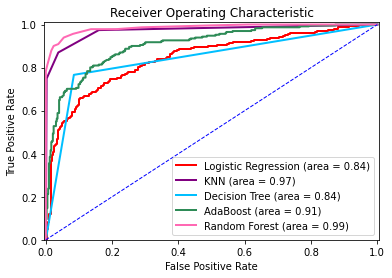

In [324]:
# Importing the "pyplot" package of "matplotlib" library of python to generate 
# graphs and plot curves:
import matplotlib.pyplot as plt

# The following line will tell Jupyter Notebook to keep the figures inside the explorer page 
# rather than openng a new figure window:
%matplotlib inline

plt.figure()

# Roc Curve:
plt.plot(fpr_lr, tpr_lr, color='red', lw=2, 
         label='Logistic Regression (area = %0.2f)' % AUC_lr)
plt.plot(fpr_knn, tpr_knn, color='purple', lw=2, 
         label='KNN (area = %0.2f)' % AUC_knn)
plt.plot(fpr_dt, tpr_dt, color='deepskyblue', lw=2, 
         label='Decision Tree (area = %0.2f)' % AUC_dt)
plt.plot(fpr_ab, tpr_ab, color='seagreen', lw=2, 
         label='AdaBoost (area = %0.2f)' % AUC_ab)
plt.plot(fpr_rf, tpr_rf, color='hotpink', lw=2, 
         label='Random Forest (area = %0.2f)' % AUC_rf)
# plt.plot(fpr_cnn, tpr_cnn, color='orange', lw=2, 
#          label='CNN (area = %0.2f)' % AUC_cnn)

# Random Guess line:
plt.plot([0, 1], [0, 1], color='blue', lw=1, linestyle='--')

# Defining The Range of X-Axis and Y-Axis:
plt.xlim([-0.005, 1.005])
plt.ylim([0.0, 1.01])

# Labels, Title, Legend:
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")

plt.show()